In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018 

https://www.footprintnetwork.org/resources/glossary/

In [227]:
sns.set_style('white')

df = pd.read_csv('NFA.CSV')
print(df.head(10))
#view our column names
df.columns

   country ISO alpha-3 code UN_region  UN_subregion  year           record  \
0  Armenia              ARM      Asia  Western Asia  1992     BiocapPerCap   
1  Armenia              ARM      Asia  Western Asia  1992     BiocapTotGHA   
2  Armenia              ARM      Asia  Western Asia  1992     EFConsPerCap   
3  Armenia              ARM      Asia  Western Asia  1992     EFConsTotGHA   
4  Armenia              ARM      Asia  Western Asia  1992  EFExportsPerCap   
5  Armenia              ARM      Asia  Western Asia  1992  EFExportsTotGHA   
6  Armenia              ARM      Asia  Western Asia  1992  EFImportsPerCap   
7  Armenia              ARM      Asia  Western Asia  1992  EFImportsTotGHA   
8  Armenia              ARM      Asia  Western Asia  1992     EFProdPerCap   
9  Armenia              ARM      Asia  Western Asia  1992     EFProdTotGHA   

      crop_land   grazing_land    forest_land  fishing_ground  built_up_land  \
0  1.611286e-01       0.135023       0.083836        0.013718

Index(['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'record', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)',
       'population'],
      dtype='object')

In [228]:
#This shows how many datapoints, how many nulls and the datatypes for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 15 columns):
country                     87020 non-null object
ISO alpha-3 code            85660 non-null object
UN_region                   87020 non-null object
UN_subregion                87020 non-null object
year                        87020 non-null int64
record                      87020 non-null object
crop_land                   63530 non-null float64
grazing_land                63530 non-null float64
forest_land                 63530 non-null float64
fishing_ground              63530 non-null float64
built_up_land               63530 non-null float64
carbon                      63530 non-null float64
total                       87020 non-null float64
Percapita GDP (2010 USD)    71410 non-null float64
population                  87020 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 8.3+ MB


#### 1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

In [229]:
df_cntry = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap'),
    ['ISO alpha-3 code','crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon']
]

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


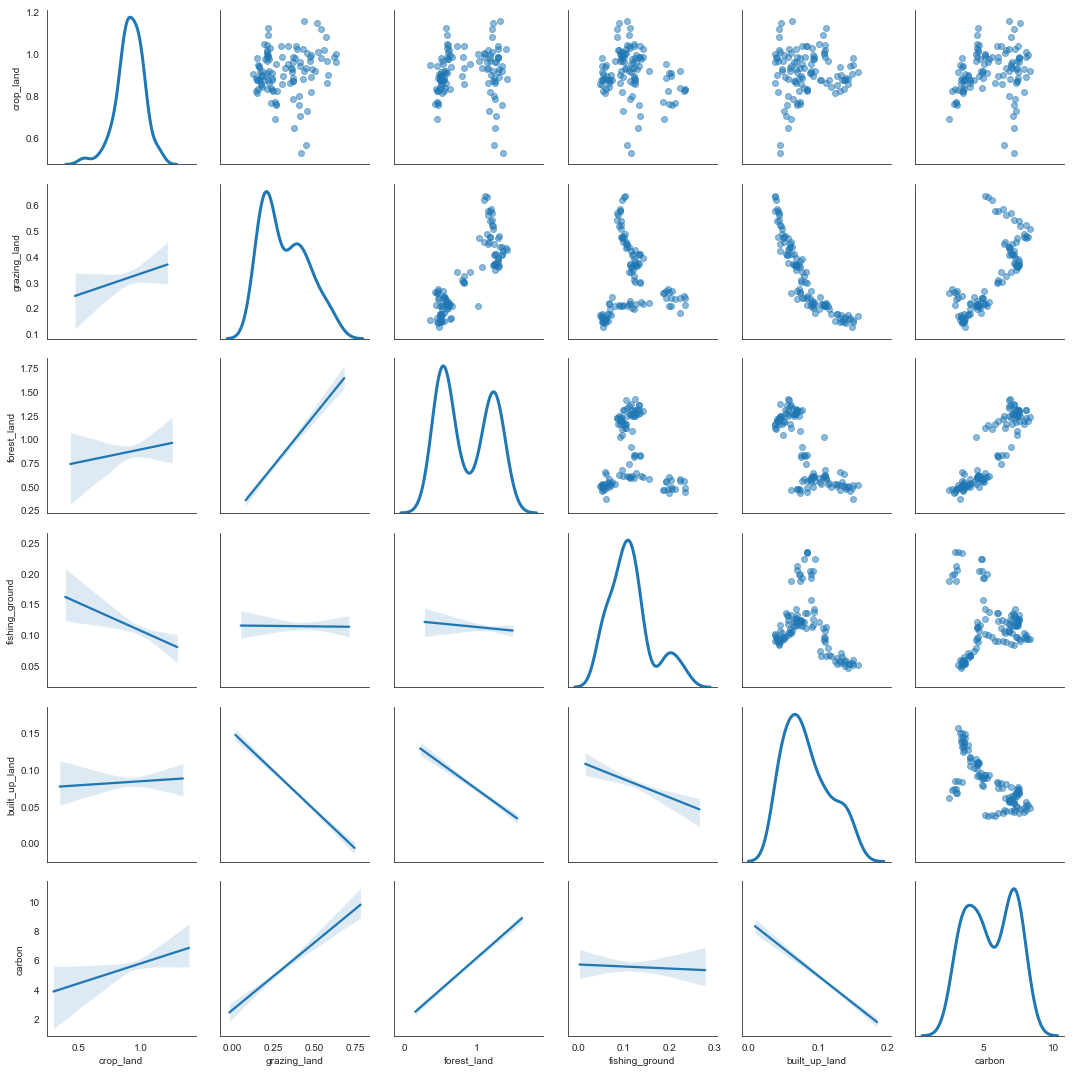

In [230]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_cntry.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                crop_land  grazing_land  forest_land  fishing_ground  \
crop_land        1.000000      0.131075     0.085122       -0.209853   
grazing_land     0.131075      1.000000     0.841165       -0.008657   
forest_land      0.085122      0.841165     1.000000       -0.084801   
fishing_ground  -0.209853     -0.008657    -0.084801        1.000000   
built_up_land    0.037478     -0.896889    -0.766221       -0.358142   
carbon           0.180833      0.760884     0.911394       -0.039234   

                built_up_land    carbon  
crop_land            0.037478  0.180833  
grazing_land        -0.896889  0.760884  
forest_land         -0.766221  0.911394  
fishing_ground      -0.358142 -0.039234  
built_up_land        1.000000 -0.729517  
carbon              -0.729517  1.000000  


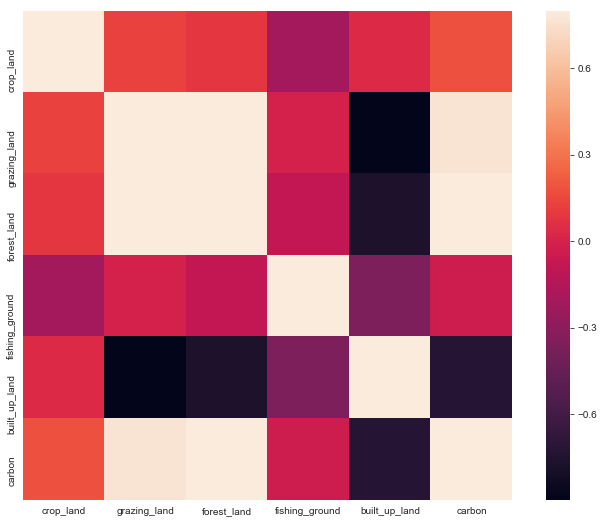

In [231]:
# Make the correlation matrix.
corrmat = df_cntry.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


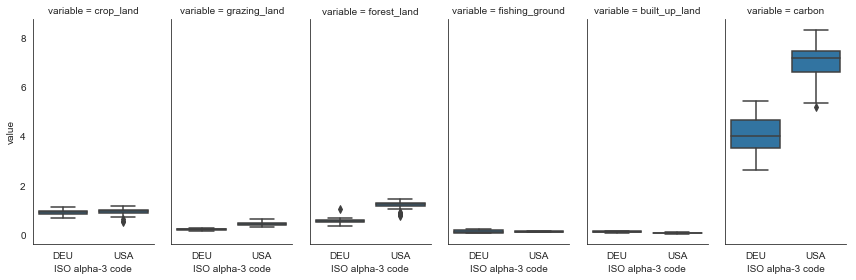

                 built_up_land                                          \
                         count      mean       std       min       25%   
ISO alpha-3 code                                                         
DEU                       54.0  0.108593  0.025399  0.061191  0.089290   
USA                       54.0  0.058194  0.013498  0.036944  0.045475   

                                               carbon              ...     \
                       50%       75%       max  count      mean    ...      
ISO alpha-3 code                                                   ...      
DEU               0.108196  0.131608  0.156702   54.0  4.055413    ...      
USA               0.057427  0.068122  0.083459   54.0  7.020589    ...      

                 forest_land           grazing_land                      \
                         75%       max        count      mean       std   
ISO alpha-3 code                                                          
DEU               

In [232]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_cntry
df_long = pd.melt(df_long, id_vars=['ISO alpha-3 code'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "ISO alpha-3 code", "value")
plt.show()

# Descriptive statistics by group.
print(df_cntry.groupby('ISO alpha-3 code').describe())

# Test whether group differences are significant.
for col in df_cntry.loc[:,'crop_land':'carbon'].columns:
    print(col)
    print(stats.ttest_ind(
        df_cntry[df_cntry['ISO alpha-3 code'] == 'USA'][col].dropna(),
        df_cntry[df_cntry['ISO alpha-3 code'] == 'DEU'][col].dropna()
    ))

Looks like crop_land and fishing_ground are not statistically different from one another 

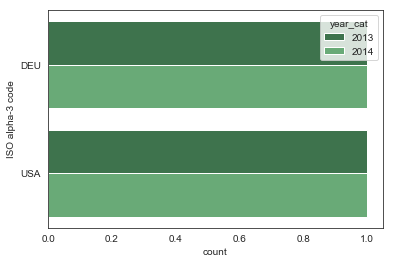

year_cat          2013  2014
ISO alpha-3 code            
DEU                  1     1
USA                  1     1
Power_divergenceResult(statistic=0.0, pvalue=1.0)


In [233]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap'),
    ['ISO alpha-3 code', 'year']
]

# Create a text variable so that output is easier to interpret.
df_2cat['year_cat'] = None
df_2cat.loc[df_2cat['year'] == 2014, 'year_cat'] = '2014'
df_2cat.loc[df_2cat['year'] == 2013, 'year_cat'] = '2013'

# Plot counts for each combination of levels.
sns.countplot(y="ISO alpha-3 code", hue="year_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['ISO alpha-3 code'], df_2cat['year_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [234]:
df_record = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap') & (df['record'] == 'BiocapPerCap'),
    ['ISO alpha-3 code','crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land']
]

In [235]:
features = pd.get_dummies(df['ISO alpha-3 code'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['ISO alpha-3 code'].isin(['SWE', 'NOR','DNK','FIN','ISL','FRO', 'ALA'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['ISO alpha-3 code']))

ISO alpha-3 code  ABW  AFG  AGO  ALB  ARE  ARG  ARM  ATG  AUS  AUT ...   UZB  \
Nordic                                                             ...         
0                 290  540  540  540  350  540  230  350  540  540 ...   230   
1                   0    0    0    0    0    0    0    0    0    0 ...     0   

ISO alpha-3 code  VEN  VNM  VUT  WSM  YEM  YUG  ZAF  ZMB  ZWE  
Nordic                                                         
0                 540  540   10  540  540  310  540  510  540  
1                   0    0    0    0    0    0    0    0    0  

[2 rows x 193 columns]


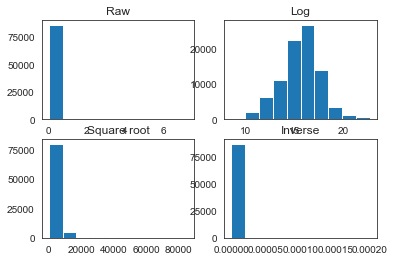

In [236]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['population'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['population'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['population'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['population'].dropna())
plt.title('Inverse')
plt.show()

# make a feature from the log one.

features['log_pop'] = np.log(df['population'])

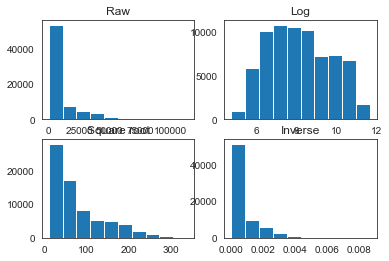

In [237]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['Percapita GDP (2010 USD)'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['Percapita GDP (2010 USD)'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['Percapita GDP (2010 USD)'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['Percapita GDP (2010 USD)'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_GDP'] = np.log(df['Percapita GDP (2010 USD)'])

In [238]:
print(df['ISO alpha-3 code'].unique())

['ARM' 'AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'AUS' 'AUT' 'BHS' 'BHR' 'BRB'
 'BGD' 'BMU' 'BTN' 'BOL' 'BWA' 'BRA' 'ABW' 'BLZ' 'BRN' 'BGR' 'MMR' 'BDI'
 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'LKA' 'TCD' 'CHL' 'COL' 'COM' 'COG' 'COK'
 'CRI' 'CUB' 'CYP' 'CSHH' 'AZE' 'BEN' 'DNK' 'DMA' 'DOM' 'BLR' 'ECU' 'EGY'
 'SLV' 'GNQ' nan 'EST' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'DJI' 'GEO' 'GAB'
 'GMB' 'DEU' 'BIH' 'GHA' 'KIR' 'GRC' 'GRD' 'GLP' 'GTM' 'GIN' 'GUY' 'HTI'
 'HND' 'HUN' 'HRV' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'CIV' 'KAZ'
 'JAM' 'JPN' 'JOR' 'KGZ' 'KEN' 'KHM' 'PRK' 'KOR' 'KWT' 'LVA' 'LAO' 'LBN'
 'LSO' 'LBR' 'LBY' 'LTU' 'MDG' 'MWI' 'MYS' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS'
 'MEX' 'MNG' 'MSR' 'MAR' 'MOZ' 'FSM' 'MDA' 'NAM' 'NPL' 'NLD' 'MKD' 'VUT'
 'NZL' 'NIC' 'NER' 'NGA' 'NOR' 'PAK' 'PAN' 'CZE' 'PNG' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'GNB' 'TLS' 'ERI' 'QAT' 'ZWE' 'REU' 'ROU' 'RWA' 'RUS' 'SCG'
 'LCA' 'STP' 'SAU' 'SEN' 'SLE' 'SVN' 'SVK' 'SGP' 'SOM' 'ZAF' 'ESP' 'SUR'
 'TJK' 'SWZ' 'SWE' 'CHE' 'SYR' 'TKM' 'TZA' 'THA' 'TG

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


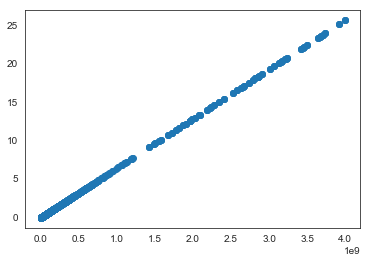

               year     crop_land  grazing_land   forest_land  fishing_ground  \
count  5.487000e+04  5.487000e+04  5.487000e+04  54870.000000    5.487000e+04   
mean   2.071931e-18  8.287723e-18 -8.287723e-18      0.000000    8.287723e-18   
std    1.000009e+00  1.000009e+00  1.000009e+00      1.000009    1.000009e+00   
min   -1.984298e+00 -1.073634e-01 -1.057476e-01     -0.090539   -9.714118e-02   
25%   -7.982584e-01 -1.073634e-01 -1.057476e-01     -0.090539   -9.714118e-02   
50%    1.242168e-01 -1.073634e-01 -1.057476e-01     -0.090539   -9.714108e-02   
75%    8.490187e-01 -9.216290e-02 -9.509144e-02     -0.081235   -8.900551e-02   
max    1.507929e+00  2.559980e+01  2.340933e+01     28.327344    2.675368e+01   

       built_up_land        carbon         total  Percapita GDP (2010 USD)  \
count   5.487000e+04  5.487000e+04  5.487000e+04              5.487000e+04   
mean   -8.287723e-18  8.287723e-18 -8.287723e-18             -3.315089e-17   
std     1.000009e+00  1.000009e+00  

In [239]:
# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['crop_land'], df_scaled['crop_land'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

In [240]:
features['scaled_crop'] = df_scaled['crop_land']
features['scaled_grazing'] = df_scaled['grazing_land']
features['scaled_forest'] = df_scaled['forest_land']
features['scaled_fishing'] = df_scaled['fishing_ground']
features['scaled_built_up'] = df_scaled['built_up_land']
features['scaled_carbon'] = df_scaled['carbon']

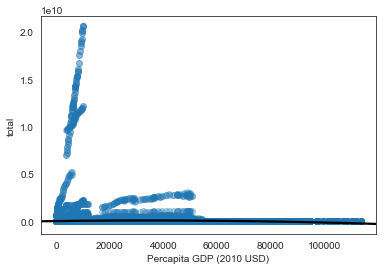

In [241]:
sns.regplot(
    df['Percapita GDP (2010 USD)'],
    y=df['total'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['GDP_squared'] = df['Percapita GDP (2010 USD)'] * df['Percapita GDP (2010 USD)']

In [242]:
means = df[['forest_land','grazing_land']].mean(axis=0)
stds = df[['forest_land','grazing_land']].std(axis=0)
features['forest_graze'] = ((df[['forest_land','grazing_land']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['forest_land', 'grazing_land']]
plotdf['forest_graze'] = features['forest_graze'] 
corrmat2 = plotdf.corr()

print(corrmat2)

              forest_land  grazing_land  forest_graze
forest_land      1.000000      0.925720      0.981254
grazing_land     0.925720      1.000000      0.981254
forest_graze     0.981254      0.981254      1.000000


In [243]:
features.head(10)

,ABW,AFG,AGO,ALB,ARE,ARG,ARM,ATG,AUS,AUT,...,log_pop,log_GDP,scaled_crop,scaled_grazing,scaled_forest,scaled_fishing,scaled_built_up,scaled_carbon,GDP_squared,forest_graze
0,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107363,-0.105748,-0.090539,-0.097141,-0.095969,-0.079603,900663.635089,-0.093273
1,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.103788,-0.098801,-0.089044,-0.096015,-0.088511,-0.079603,900663.635089,-0.088735
2,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107363,-0.105748,-0.090539,-0.097141,-0.095969,-0.079603,900663.635089,-0.093273
3,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.098689,-0.096016,-0.090539,-0.096801,-0.088511,-0.069259,900663.635089,-0.088043
4,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107363,-0.105748,-0.090539,-0.097141,-0.095969,-0.079603,900663.635089,-0.093273
5,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107338,-0.105630,-0.090539,-0.097105,-0.095969,-0.079155,900663.635089,-0.093210
6,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107363,-0.105748,-0.090539,-0.097141,-0.095969,-0.079603,900663.635089,-0.093273
7,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.102239,-0.102846,-0.090539,-0.096869,-0.095969,-0.078786,900663.635089,-0.091713
8,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.107363,-0.105748,-0.090539,-0.097141,-0.095969,-0.079603,900663.635089,-0.093273
9,0,0,0,0,0,0,1,0,0,0,...,15.053595,6.855444,-0.103788,-0.098801,-0.090539,-0.097037,-0.088511,-0.069629,900663.635089,-0.089539


In [247]:
df_pca = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap'),
    ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon']
]

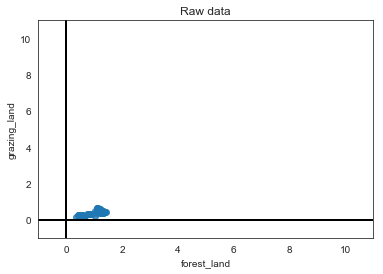

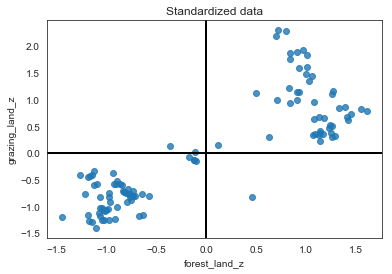

In [248]:
t = sns.regplot(
    'forest_land',
    'grazing_land',
    df_pca,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['forest_land_z'] = (df_pca['forest_land'] - df_pca['forest_land'].mean()) / df_pca['forest_land'].std()
df_pca['grazing_land_z'] = (df_pca['grazing_land'] - df_pca['grazing_land'].mean()) / df_pca['grazing_land'].std()

t = sns.regplot(
    'forest_land_z',
    'grazing_land_z',
    df_pca,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


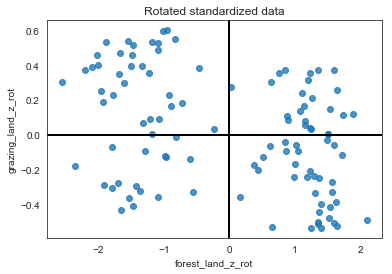

In [249]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['forest_land_z_rot'] = math.cos(40) * df_pca['forest_land_z'] - math.sin(40) * df_pca['forest_land_z']
df_pca['grazing_land_z_rot'] = math.sin(40) * df_pca['grazing_land_z'] + math.cos(40) * df_pca['grazing_land_z']

t = sns.regplot(
    'forest_land_z_rot',
    'grazing_land_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In [250]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00934579  0.13230003  0.08591785 -0.21181416  0.03782827  0.18252331
   0.08591785  0.13230003 -0.08591785  0.13230003]
 [ 0.13230003  1.00934579  0.84902596 -0.00873791 -0.9052711   0.76799538
   0.84902596  1.00934579 -0.84902596  1.00934579]
 [ 0.08591785  0.84902596  1.00934579 -0.08559364 -0.7733824   0.91991172
   1.00934579  0.84902596 -1.00934579  0.84902596]
 [-0.21181416 -0.00873791 -0.08559364  1.00934579 -0.36148925 -0.03960104
  -0.08559364 -0.00873791  0.08559364 -0.00873791]
 [ 0.03782827 -0.9052711  -0.7733824  -0.36148925  1.00934579 -0.73633442
  -0.7733824  -0.9052711   0.7733824  -0.9052711 ]
 [ 0.18252331  0.76799538  0.91991172 -0.03960104 -0.73633442  1.00934579
   0.91991172  0.76799538 -0.91991172  0.76799538]
 [ 0.08591785  0.84902596  1.00934579 -0.08559364 -0.7733824   0.91991172
   1.00934579  0.84902596 -1.00934579  0.84902596]
 [ 0.13230003  1.00934579  0.84902596 -0.00873791 -0.9052711   0.76799538
   0.84902596  1.00934579 -0.84

In [251]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 10).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.04614871]
 [-0.35856423]
 [-0.35932057]
 [ 0.00066989]
 [ 0.33377668]
 [-0.33678517]
 [-0.35932057]
 [-0.35856423]
 [ 0.35932057]
 [-0.35856423]]
Eigenvalue 1: 7.161569187186805
----------------------------------------
Eigenvector 2: 
[[-0.55783763]
 [ 0.0264011 ]
 [-0.07519575]
 [ 0.74192039]
 [-0.3321327 ]
 [-0.0948943 ]
 [-0.07519575]
 [ 0.0264011 ]
 [ 0.07519575]
 [ 0.0264011 ]]
Eigenvalue 2: 1.3605896645230229
----------------------------------------
Eigenvector 3: 
[[-0.80279902]
 [-0.0951935 ]
 [ 0.1683189 ]
 [-0.46256964]
 [ 0.16671675]
 [ 0.03961592]
 [ 0.1683189 ]
 [-0.0951935 ]
 [-0.1683189 ]
 [-0.0951935 ]]
Eigenvalue 3: 0.8634578158119296
----------------------------------------
Eigenvector 4: 
[[ 0.15062649]
 [-0.3736099 ]
 [ 0.27226957]
 [ 0.35362618]
 [ 0.13767933]
 [ 0.43835985]
 [ 0.27226957]
 [-0.3736099 ]
 [-0.27226957]
 [-0.3736099 ]]
Eigenvalue 4: 0.559283386418508
----------------------------------------
Eigenvector 5: 
[[-0.10320888]
 [-0.00

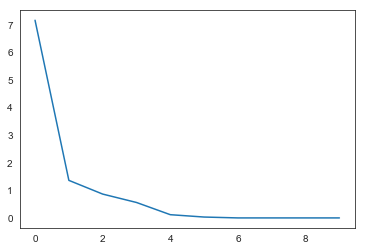

In [252]:
plt.plot(eig_val_cov)
plt.show()

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


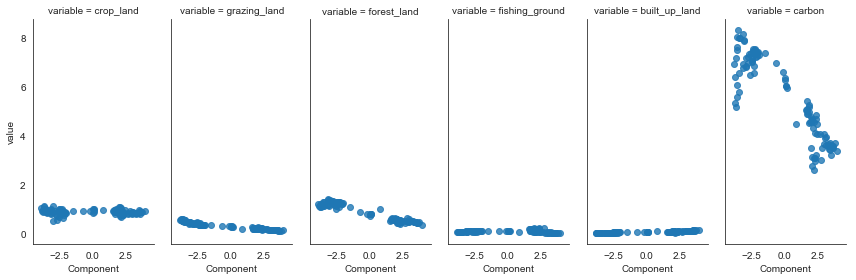

In [253]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_cntry[['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.70952584 0.13479916 0.08554628 0.05541048 0.0115816  0.00313664]


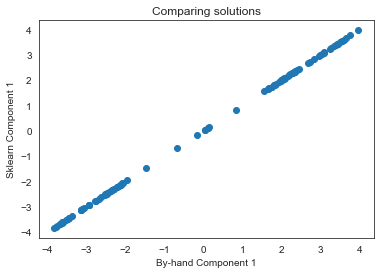

In [254]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()